In [ ]:
#setup kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"biswajit01","key":"aedf99365722bfcb1e5909c8c7b1f10b"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!rm -rf sample_data

In [ ]:
!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 7.92MB/s]


In [ ]:
!unzip diabetes-dataset.zip -d data

Archive:  diabetes-dataset.zip
  inflating: data/diabetes.csv       


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

In [ ]:
df=pd.read_csv("/content/data/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#calculating total number of nan value counts
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#value specific counts of pregnancies column
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [ ]:
palette=sns.color_palette("hls")
sns.set_palette(palette)

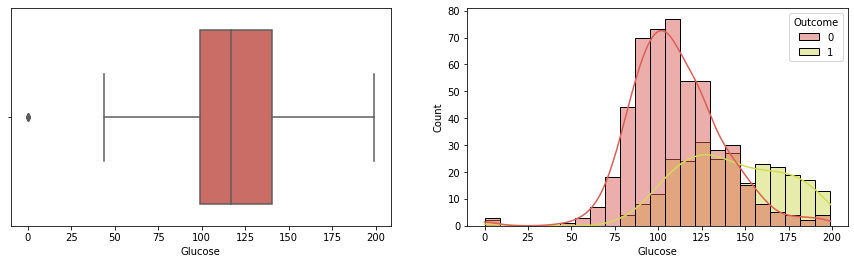

In [ ]:
#box plot and histogram plot of glucose column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='Glucose', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="Glucose",kde=True)

plt.show()

In [ ]:
#the data is little bit right skewed and outlier count is low, so we can keep the outlier value

In [ ]:
#check the data counts which have glucose value 0
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


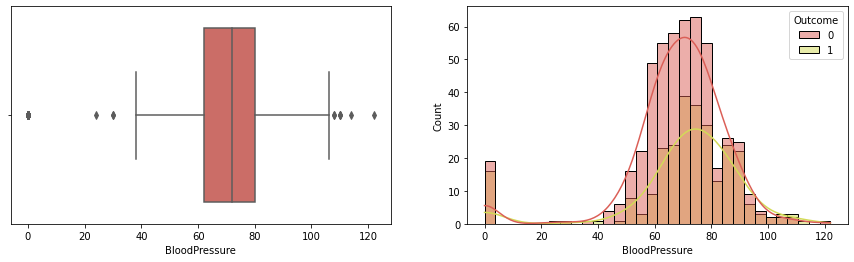

In [ ]:
#box plot and histogram plot of bloodPressurw
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='BloodPressure', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="BloodPressure",kde=True)

plt.show()

In [ ]:
#checking the bloodpressure data is skewed or not
df['BloodPressure'].skew()

-1.8436079833551302

In [ ]:
#its negative so,its not skewed
#another statistical measure for the bloodpressure column
print("Mean value of bp",df['BloodPressure'].mean())
print("Median value of bp",df['BloodPressure'].median())
print("Standard deviation of bp",df['BloodPressure'].std())
print("Minimum value of bp",df['BloodPressure'].min())
print("Maximum value of bp",df['BloodPressure'].max())

Mean value of bp 69.10546875
Median value of bp 72.0
Standard deviation of bp 19.355807170644777
Minimum value of bp 0
Maximum value of bp 122


In [ ]:
#here i used zscore =2 ,above the 2 or below 2 will consider as outlier
# below i added the link from where i got the list of blood pressures 
# https://emoha.com/blogs/health/what-is-normal-bp-range-for-women-and-men

In [ ]:
#calculating the upper and lower limit to detect the outliers
upper_limit = df['BloodPressure'].mean() + 2*df['BloodPressure'].std()
lower_limit = df['BloodPressure'].mean() - 2*df['BloodPressure'].std()
print(upper_limit,lower_limit)

107.81708309128956 30.393854408710446


In [ ]:
#count the values which are above the upper and below the lower limit
len(df[(df['BloodPressure'] > upper_limit) | (df['BloodPressure'] < lower_limit)])

45

In [ ]:
#its a big number if removed it will be bad for model training, so will modify them

#creating another column in the dataframe to load the modified value of bloodpressure and ploting the values, if any problem occured we will
#drop the new column and treat the outliers again by using original columns value

#blood pressure 0 not possible because BloodPressure 0 means the body is dead
#minimum 60-70 can be consideres as normal blood pressure, so replacing it with the mean of blood pressure
bp_mean=df['BloodPressure'].mean()
df['bloodPressure_modified'] = np.where(
    df['BloodPressure']>upper_limit,
    bp_mean,
    np.where(
        df['BloodPressure']<lower_limit,
        bp_mean,
        df['BloodPressure']
    )
)
df['bloodPressure_modified'].describe()

count    768.000000
mean      72.027013
std       11.170450
min       38.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      106.000000
Name: bloodPressure_modified, dtype: float64

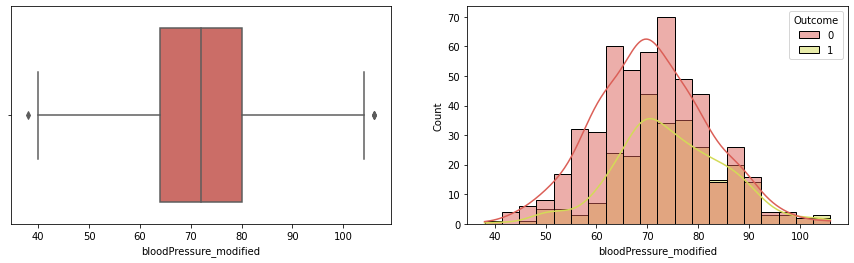

In [ ]:
#ploting the bloodpressure modified column to check the outliers
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='bloodPressure_modified', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="bloodPressure_modified",kde=True)

plt.show()

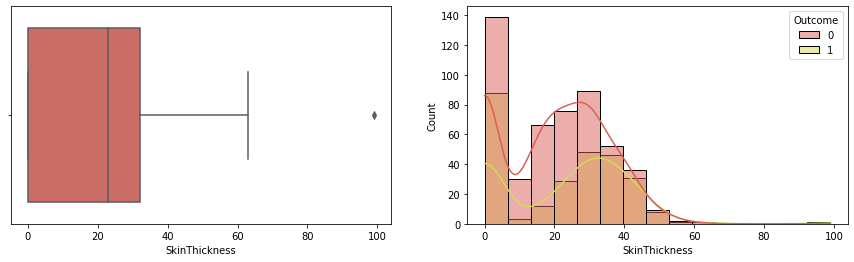

In [ ]:
#box plot and histogram plot of bloodPressurw
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='SkinThickness', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="SkinThickness",kde=True)

plt.show()

In [ ]:
#checking skinthickness column is skewed or not
df['SkinThickness'].skew()

0.10937249648187608

In [ ]:
# will use iqr technique to remove the outlier
df['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [ ]:
#calculating the lower and upper values for the iqr
percentile25 = df['SkinThickness'].quantile(0.25)
percentile75 = df['SkinThickness'].quantile(0.75)

iqr = percentile75 - percentile25

upper_skin_limit = percentile75 + 1.5 * iqr
lower_skin_limit = percentile25 - 1.5 * iqr

print("percentile25 ",percentile25)
print("percentile75 ",percentile75)
print("iqr ",iqr)
print("upper_limit ",upper_skin_limit)
print("lower limit ",lower_skin_limit)

percentile25  0.0
percentile75  32.0
iqr  32.0
upper_limit  80.0
lower limit  -48.0


In [ ]:
#listing the data points which are above upper and below lower
df[(df['SkinThickness'] > upper_skin_limit) | (df['SkinThickness'] < lower_skin_limit)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bloodPressure_modified
579,2,197,70,99,0,34.7,0.575,62,1,70.0


In [ ]:
#droping the single outlier
df=df.drop([579], axis=0)

In [ ]:
#after droping the plot

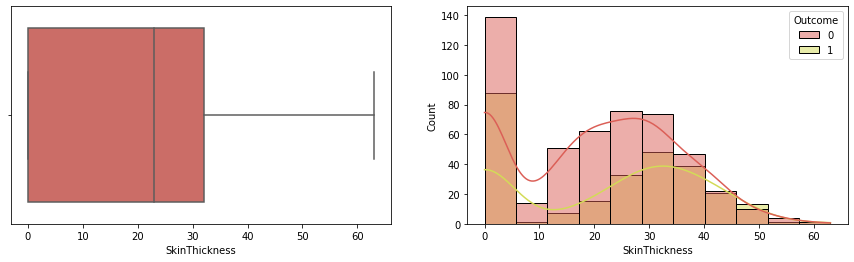

In [ ]:
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='SkinThickness', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="SkinThickness",kde=True)

plt.show()

In [ ]:
#statistical info of insulin
df['Insulin'].describe()

count    767.000000
mean      79.903520
std      115.283105
min        0.000000
25%        0.000000
50%       32.000000
75%      127.500000
max      846.000000
Name: Insulin, dtype: float64

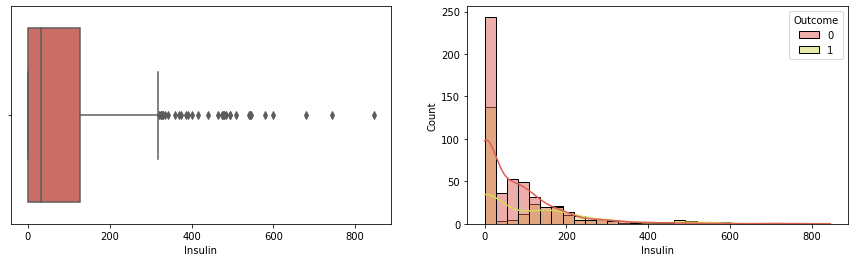

In [ ]:
#ploting the visualization of insulin 
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='Insulin', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="Insulin",kde=True)

plt.show()